<a href="https://colab.research.google.com/github/VandersonGJesus/lia1_2024_1/blob/main/Ci%C3%AAncia_de_Dados_Registro_de_Ocupa%C3%A7%C3%A3o_Hospitalar_COVID_19_em_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciência de Dados - Registro de Ocupação Hospitalar COVID-19 em 2022**

O Ministério da Saúde, por meio da Secretaria de Atenção Especializada em Saúde (SAES), implementou, devido à pandemia, o registro das internações por meio do Sistema ESUS Notifica-Módulo Internações SUS.

**Os dados do presente dataset serão modificados (tratados) a fim de utilizar as técnicas de estudo de tratamento de dados**



## **🛜 Importações / Conexões**



In [ ]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
# Conectanto com o Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Agora com as conexões necessárias podemos carregar o dataset.

## 📶 **Carregamento dos Dados**



In [ ]:
# Obtem o dataset do Drive
ROH_Covid19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aula 10 - Ciência de Dados - Casa Super Store/Entrega/dataset/esus-vepi.LeitoOcupacao_2022.csv')

In [ ]:
# Forma do dataset -> (linhas, colunas)
ROH_Covid19.shape

(291913, 26)

In [ ]:
# Amostra dos dados do topo
ROH_Covid19.head()

,Unnamed: 0,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,641508,PBGTlqtFBP,2022-01-17T03:00:00.000Z,2379341,13.0,8.0,0.0,0.0,0.0,1.0,...,parse-cloud,_User$m6WdvZgbBS,Santa Catarina,Mafra,Santa Catarina,Mafra,False,False,2021-02-15T11:08:07.797Z,2022-01-17T21:56:42.351Z
1,1275198,ipPHkH1yIB,2022-01-05T03:00:00.000Z,2594366,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$C2nTBR5lmy,Paraná,Umuarama,Paraná,Umuarama,False,False,2021-12-08T10:42:04.123Z,2022-01-05T14:17:35.799Z
2,1290474,oDyVTndNXc,2022-01-01T03:00:50.682Z,2747871,NaN,NaN,NaN,NaN,1.0,9.0,...,parse-cloud,_User$APEoiAf61c,São Paulo,Ilhabela,São Paulo,Ilhabela,False,False,2022-01-01T03:34:58.234Z,2022-01-01T03:34:58.234Z
3,1290489,cTrwNtInVV,2022-01-01T03:00:08.570Z,2082497,NaN,NaN,NaN,NaN,0.0,1.0,...,parse-cloud,_User$q0FgtTNz2d,São Paulo,Bernardino de Campos,São Paulo,Bernardino de Campos,False,False,2022-01-01T04:50:29.194Z,2022-01-01T04:50:29.194Z
4,1290490,CPkiO32WyI,2022-01-01T03:00:14.691Z,2092980,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$u4yOaQOJlf,São Paulo,Bastos,São Paulo,Bastos,False,False,2022-01-01T05:01:31.468Z,2022-01-01T05:01:31.468Z


In [ ]:
# Amostra dos dados do final
ROH_Covid19.tail()

,Unnamed: 0,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
291908,1677188,Ho7WAuOvai,2022-02-06T03:00:00.000Z,2161575,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$lrIXrpQGDr,Minas Gerais,Mercês,Minas Gerais,Mercês,False,False,2024-02-07T02:50:34.233Z,2024-02-07T02:50:34.233Z
291909,1678299,IFnkhud0Zw,2022-02-01T03:00:00.000Z,2117568,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$K5rViczCwC,Minas Gerais,Entre Rios de Minas,Minas Gerais,Entre Rios de Minas,False,False,2024-02-16T11:43:27.128Z,2024-02-16T11:43:27.128Z
291910,1678346,OuoaBDRx08,2022-01-31T03:00:00.000Z,2117568,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$K5rViczCwC,Minas Gerais,Entre Rios de Minas,Minas Gerais,Entre Rios de Minas,False,False,2024-02-16T12:22:44.623Z,2024-02-16T12:22:44.623Z
291911,1678731,WeXvgcJett,2022-02-16T03:00:00.000Z,2761009,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$LxaEhIBoCd,Minas Gerais,Elói Mendes,Minas Gerais,Elói Mendes,False,False,2024-02-19T16:48:17.185Z,2024-02-19T16:48:17.185Z
291912,1680316,3FNItU20Zb,2022-03-01T03:00:00.000Z,2761009,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$LxaEhIBoCd,Minas Gerais,Elói Mendes,Minas Gerais,Elói Mendes,False,False,2024-03-01T13:20:28.891Z,2024-03-01T13:20:28.891Z


## 🔎 **Análise de Dados**



In [ ]:
# Imprimindo o inicio e fim novamente
ROH_Covid19

,Unnamed: 0,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,641508,PBGTlqtFBP,2022-01-17T03:00:00.000Z,2379341,13.0,8.0,0.0,0.0,0.0,1.0,...,parse-cloud,_User$m6WdvZgbBS,Santa Catarina,Mafra,Santa Catarina,Mafra,False,False,2021-02-15T11:08:07.797Z,2022-01-17T21:56:42.351Z
1,1275198,ipPHkH1yIB,2022-01-05T03:00:00.000Z,2594366,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$C2nTBR5lmy,Paraná,Umuarama,Paraná,Umuarama,False,False,2021-12-08T10:42:04.123Z,2022-01-05T14:17:35.799Z
2,1290474,oDyVTndNXc,2022-01-01T03:00:50.682Z,2747871,NaN,NaN,NaN,NaN,1.0,9.0,...,parse-cloud,_User$APEoiAf61c,São Paulo,Ilhabela,São Paulo,Ilhabela,False,False,2022-01-01T03:34:58.234Z,2022-01-01T03:34:58.234Z
3,1290489,cTrwNtInVV,2022-01-01T03:00:08.570Z,2082497,NaN,NaN,NaN,NaN,0.0,1.0,...,parse-cloud,_User$q0FgtTNz2d,São Paulo,Bernardino de Campos,São Paulo,Bernardino de Campos,False,False,2022-01-01T04:50:29.194Z,2022-01-01T04:50:29.194Z
4,1290490,CPkiO32WyI,2022-01-01T03:00:14.691Z,2092980,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$u4yOaQOJlf,São Paulo,Bastos,São Paulo,Bastos,False,False,2022-01-01T05:01:31.468Z,2022-01-01T05:01:31.468Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291908,1677188,Ho7WAuOvai,2022-02-06T03:00:00.000Z,2161575,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$lrIXrpQGDr,Minas Gerais,Mercês,Minas Gerais,Mercês,False,False,2024-02-07T02:50:34.233Z,2024-02-07T02:50:34.233Z
291909,1678299,IFnkhud0Zw,2022-02-01T03:00:00.000Z,2117568,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$K5rViczCwC,Minas Gerais,Entre Rios de Minas,Minas Gerais,Entre Rios de Minas,False,False,2024-02-16T11:43:27.128Z,2024-02-16T11:43:27.128Z
291910,1678346,OuoaBDRx08,2022-01-31T03:00:00.000Z,2117568,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$K5rViczCwC,Minas Gerais,Entre Rios de Minas,Minas Gerais,Entre Rios de Minas,False,False,2024-02-16T12:22:44.623Z,2024-02-16T12:22:44.623Z
291911,1678731,WeXvgcJett,2022-02-16T03:00:00.000Z,2761009,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$LxaEhIBoCd,Minas Gerais,Elói Mendes,Minas Gerais,Elói Mendes,False,False,2024-02-19T16:48:17.185Z,2024-02-19T16:48:17.185Z


In [ ]:
# Colunas do conjunto de dados
ROH_Covid19.columns

Index(['Unnamed: 0', '_id', 'dataNotificacao', 'cnes', 'ocupacaoSuspeitoCli',
       'ocupacaoSuspeitoUti', 'ocupacaoConfirmadoCli', 'ocupacaoConfirmadoUti',
       'ocupacaoCovidUti', 'ocupacaoCovidCli', 'ocupacaoHospitalarUti',
       'ocupacaoHospitalarCli', 'saidaSuspeitaObitos', 'saidaSuspeitaAltas',
       'saidaConfirmadaObitos', 'saidaConfirmadaAltas', 'origem', '_p_usuario',
       'estadoNotificacao', 'municipioNotificacao', 'estado', 'municipio',
       'excluido', 'validado', '_created_at', '_updated_at'],
      dtype='object')

In [ ]:
# Verificando o tipo de dado de cada coluna
ROH_Covid19.dtypes

Unnamed: 0                 int64
_id                       object
dataNotificacao           object
cnes                      object
ocupacaoSuspeitoCli      float64
ocupacaoSuspeitoUti      float64
ocupacaoConfirmadoCli    float64
ocupacaoConfirmadoUti    float64
ocupacaoCovidUti         float64
ocupacaoCovidCli         float64
ocupacaoHospitalarUti    float64
ocupacaoHospitalarCli    float64
saidaSuspeitaObitos      float64
saidaSuspeitaAltas       float64
saidaConfirmadaObitos    float64
saidaConfirmadaAltas     float64
origem                    object
_p_usuario                object
estadoNotificacao         object
municipioNotificacao      object
estado                    object
municipio                 object
excluido                    bool
validado                    bool
_created_at               object
_updated_at               object
dtype: object

In [ ]:
# Resumo estatístico da coluna com a ocupação hospitalar em UTIs
ROH_Covid19['ocupacaoHospitalarUti'].describe()

count    291913.000000
mean          9.272002
std          24.810444
min          -5.000000
25%           0.000000
50%           0.000000
75%          10.000000
max        8191.000000
Name: ocupacaoHospitalarUti, dtype: float64

In [ ]:
# Resumo estatístico da coluna com a ocupação hospitalar em clínicas
ROH_Covid19['ocupacaoHospitalarCli'].describe()

count    291913.000000
mean         39.331260
std          78.606342
min          -1.000000
25%           2.000000
50%          13.000000
75%          46.000000
max       21701.000000
Name: ocupacaoHospitalarCli, dtype: float64

In [ ]:
# Resumo estatístico da coluna com o númeoro de óbitos confirmados
ROH_Covid19['saidaConfirmadaObitos'].describe()

count    291913.000000
mean          0.816925
std          14.115467
min          -2.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3300.000000
Name: saidaConfirmadaObitos, dtype: float64

In [ ]:
# Verificando se há registros duplicados
ROH_Covid19[ROH_Covid19.duplicated()]

,Unnamed: 0,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at


❗Em primeira instância vemos que existem colunas desnecessárias e linhas em branco.❗

Sendo assim, faz-se necessário efetuar o **tratamento desses dados**.

## 🕵️**Tratamento de Dados**



In [ ]:
# Remove colunas que não serão usadas no relatório
ROH_Covid19_Tratado = ROH_Covid19.drop(columns=['Unnamed: 0',
                                      '_id','cnes',
                                      'ocupacaoSuspeitoCli',
                                      'ocupacaoSuspeitoUti',
                                      'saidaSuspeitaObitos',
                                      'saidaSuspeitaAltas',
                                      'estadoNotificacao',
                                      'municipioNotificacao',
                                      'municipio','excluido',
                                      'validado',
                                      '_created_at',
                                      '_updated_at','origem',
                                      '_p_usuario',
                                      'saidaConfirmadaAltas',
                                      'ocupacaoConfirmadoCli',
                                      'ocupacaoConfirmadoUti',
                                      'ocupacaoCovidUti',
                                      'ocupacaoCovidCli',])


# Imprimir o dataframe
display(ROH_Covid19_Tratado.head(n=10))

,dataNotificacao,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaConfirmadaObitos,estado
0,2022-01-17T03:00:00.000Z,8.0,12.0,0.0,Santa Catarina
1,2022-01-05T03:00:00.000Z,9.0,31.0,0.0,Paraná
2,2022-01-01T03:00:50.682Z,3.0,14.0,0.0,São Paulo
3,2022-01-01T03:00:08.570Z,0.0,3.0,0.0,São Paulo
4,2022-01-01T03:00:14.691Z,0.0,3.0,0.0,São Paulo
5,2022-01-01T03:00:37.005Z,0.0,3.0,0.0,Santa Catarina
6,2022-01-01T03:00:06.730Z,0.0,0.0,0.0,Rio Grande do Sul
7,2022-01-01T03:00:21.351Z,10.0,13.0,0.0,São Paulo
8,2022-01-01T03:00:37.452Z,0.0,4.0,0.0,São Paulo
9,2022-01-01T03:00:22.259Z,2.0,13.0,0.0,São Paulo


Bem melhor agora de vizualizar os dados mais importantes do nosso dataset.

In [ ]:
# Imprime as colunas que serão utilizadas
ROH_Covid19_Tratado.columns

Index(['dataNotificacao', 'ocupacaoHospitalarUti', 'ocupacaoHospitalarCli',
       'saidaConfirmadaObitos', 'estado'],
      dtype='object')

In [ ]:
# Renomear nome das colunas
df_ROH_Covid19_Tratado = ROH_Covid19_Tratado.rename(columns={
    'dataNotificacao': 'Data de Notificação',
    'ocupacaoHospitalarUti': 'Ocupação Hospitalar UTI',
    'ocupacaoHospitalarCli': 'Ocupação Hospitalar Clínica',
    'saidaConfirmadaObitos': 'Óbitos Confirmados',
    'estado': 'Estado'
})

display(df_ROH_Covid19_Tratado.head())

,Data de Notificação,Ocupação Hospitalar UTI,Ocupação Hospitalar Clínica,Óbitos Confirmados,Estado
0,2022-01-17T03:00:00.000Z,8.0,12.0,0.0,Santa Catarina
1,2022-01-05T03:00:00.000Z,9.0,31.0,0.0,Paraná
2,2022-01-01T03:00:50.682Z,3.0,14.0,0.0,São Paulo
3,2022-01-01T03:00:08.570Z,0.0,3.0,0.0,São Paulo
4,2022-01-01T03:00:14.691Z,0.0,3.0,0.0,São Paulo


In [ ]:
# imprimindo colunas
df_ROH_Covid19_Tratado.columns

Index(['Data de Notificação', 'Ocupação Hospitalar UTI',
       'Ocupação Hospitalar Clínica', 'Óbitos Confirmados', 'Estado'],
      dtype='object')

Agora vamos verificar os dados de uma forma mais sucinta.

In [ ]:
# Apresenta as principais estatísticas da base de dados para atributos numéricos
df_detalhes = df_ROH_Covid19_Tratado.describe()

display(df_ROH_Covid19_Tratado)

,Data de Notificação,Ocupação Hospitalar UTI,Ocupação Hospitalar Clínica,Óbitos Confirmados,Estado
0,2022-01-17T03:00:00.000Z,8.0,12.0,0.0,Santa Catarina
1,2022-01-05T03:00:00.000Z,9.0,31.0,0.0,Paraná
2,2022-01-01T03:00:50.682Z,3.0,14.0,0.0,São Paulo
3,2022-01-01T03:00:08.570Z,0.0,3.0,0.0,São Paulo
4,2022-01-01T03:00:14.691Z,0.0,3.0,0.0,São Paulo
...,...,...,...,...,...
291908,2022-02-06T03:00:00.000Z,0.0,4.0,0.0,Minas Gerais
291909,2022-02-01T03:00:00.000Z,0.0,36.0,0.0,Minas Gerais
291910,2022-01-31T03:00:00.000Z,0.0,31.0,0.0,Minas Gerais
291911,2022-02-16T03:00:00.000Z,0.0,11.0,0.0,Minas Gerais


In [ ]:
# Converter a coluna 'Data de Notificação' para o tipo de dado "Data"
df_ROH_Covid19_Tratado['Data de Notificação'] = pd.to_datetime(df_ROH_Covid19_Tratado['Data de Notificação'])

# Verificar o tipo de dados após a conversão
print(df_ROH_Covid19_Tratado['Data de Notificação'].dtype)

# Com o método dt iremos criar uma coluna com o mês
df_ROH_Covid19_Tratado['Mês'] = df_ROH_Covid19_Tratado['Data de Notificação'].dt.month

datetime64[ns, UTC]


In [ ]:
# Imprimindo após as alterações
display(df_ROH_Covid19_Tratado)

,Data de Notificação,Ocupação Hospitalar UTI,Ocupação Hospitalar Clínica,Óbitos Confirmados,Estado,Mês
0,2022-01-17 03:00:00+00:00,8.0,12.0,0.0,Santa Catarina,1
1,2022-01-05 03:00:00+00:00,9.0,31.0,0.0,Paraná,1
2,2022-01-01 03:00:50.682000+00:00,3.0,14.0,0.0,São Paulo,1
3,2022-01-01 03:00:08.570000+00:00,0.0,3.0,0.0,São Paulo,1
4,2022-01-01 03:00:14.691000+00:00,0.0,3.0,0.0,São Paulo,1
...,...,...,...,...,...,...
291908,2022-02-06 03:00:00+00:00,0.0,4.0,0.0,Minas Gerais,2
291909,2022-02-01 03:00:00+00:00,0.0,36.0,0.0,Minas Gerais,2
291910,2022-01-31 03:00:00+00:00,0.0,31.0,0.0,Minas Gerais,1
291911,2022-02-16 03:00:00+00:00,0.0,11.0,0.0,Minas Gerais,2


Agora com os dados tratados podemos podemos fazer alguns desafios.

## **Desafio 1️⃣ - Nível júnior**

Qual o nível de ocupação média mensal de ocupção hospitalar UTI e Clínica? Contrua um Gráfico de barras com tais dados.

In [ ]:
# Agrupar os dados por mês e calcular a média da ocupação hospitalar para UTI e Clínica
ocupacao_media_por_mes = df_ROH_Covid19_Tratado.groupby('Mês')[['Ocupação Hospitalar UTI', 'Ocupação Hospitalar Clínica']].mean()

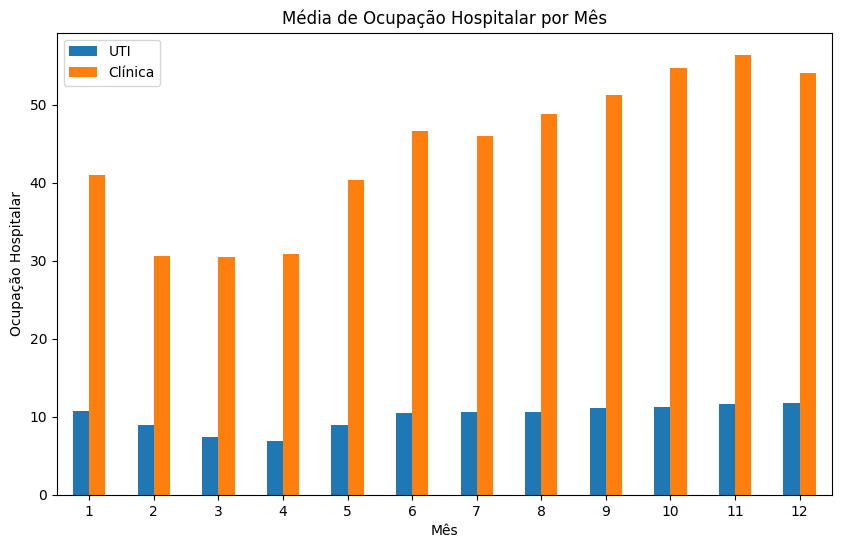

In [ ]:
# Plotar o gráfico de barras
ocupacao_media_por_mes.plot(kind='bar', figsize=(10, 6)) # Plotando um gráfico de barras com dimensões 10x6
plt.title('Média de Ocupação Hospitalar por Mês') # Título do Gráfico
plt.xlabel('Mês') # Nome do Eixo X
plt.ylabel('Ocupação Hospitalar') # Nome do Eixo Y
plt.xticks(rotation=0)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.legend(['UTI', 'Clínica']) # Legenda
plt.show()

Aqui vemos o número de UTI foi bem menor comparado com as clínicas, na qual verificando no dataset temos realmente os dados foram menores.

## **Desafio 2️⃣ - Nível Master**

Faça uma análise detalhada dos dados e apresente os que esses dados nos apresenta.

1. **Análise de óbitos por mês**

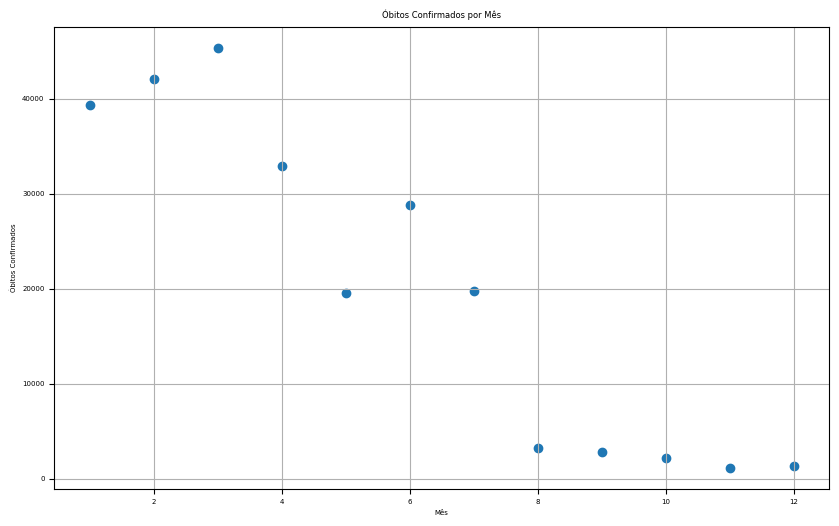

In [ ]:
# Agrupar os dados por mês e calcular a soma de óbitos confirmados para cada mês
obitos_por_mes = df_ROH_Covid19_Tratado.groupby('Mês')['Óbitos Confirmados'].sum()

# Plotar o gráfico de dispersão para óbitos confirmados por mês
plt.figure(figsize=(10, 6))
plt.scatter(obitos_por_mes.index, obitos_por_mes.values)
plt.title('Óbitos Confirmados por Mês')
plt.xlabel('Mês')
plt.ylabel('Óbitos Confirmados')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Nesta priemira análise vemos que o númeor de óbitos, felizmente, foi diminuindo conforme o tempo. O que nos apresenta um dos efeitos deixados pelas vacinas, uma vez quanto mais protegida a populção estava mais diminuiamos o nível de mortes pelo país.

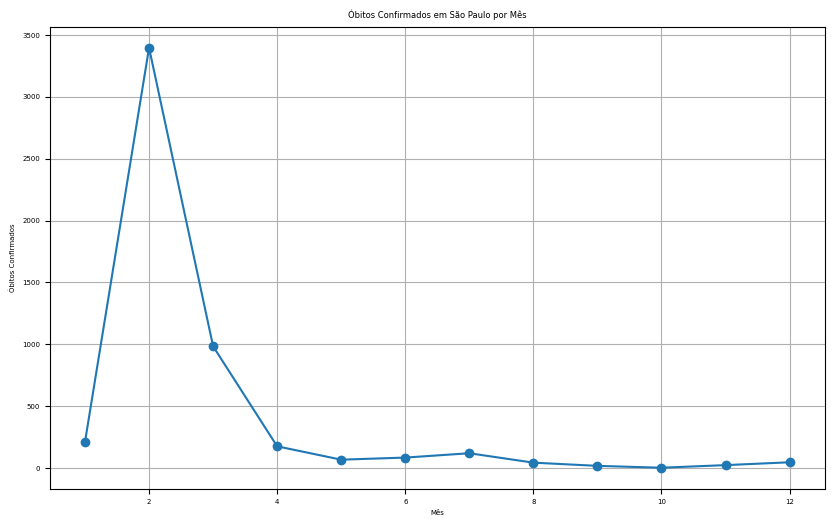

In [ ]:
# Filtrar os dados apenas para o estado de São Paulo
sp_data = df_ROH_Covid19_Tratado[df_ROH_Covid19_Tratado['Estado'] == 'São Paulo']

# Agrupar os dados por mês e calcular a soma de óbitos confirmados para São Paulo
obitos_sp_por_mes = sp_data.groupby('Mês')['Óbitos Confirmados'].sum()

# Plotar o gráfico de linha para óbitos confirmados em São Paulo por mês
plt.figure(figsize=(10, 6))
plt.plot(obitos_sp_por_mes.index, obitos_sp_por_mes.values, marker='o')
plt.title('Óbitos Confirmados em São Paulo por Mês')
plt.xlabel('Mês')
plt.ylabel('Óbitos Confirmados')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Vemos que em São Paulo foi onde houve uma maior número de casos, por ter uma das megas cidades do mundo.

Vemos também que em fevereiro foi onde houve um aumento significativo. Isso, muito provavelmente, se deu devido o carnaval, pois nesse movimento é onde ocorre mais interações em todas as pessoas na qual aumenta o contato de pessoas e, consequentemente, o disseminação da doença.

## **Desafio 3️⃣ - Nível Sênior**

Faça uma análise geografica do nível de ocupação e número de óbitos por estado.

In [ ]:
# Primeiro vamos fazer as contagens

# Calcular a soma geral do nível de ocupação de UTI por estado
soma_uti_por_estado = df_ROH_Covid19_Tratado.groupby('Estado')['Ocupação Hospitalar UTI'].sum()

# Calcular a soma geral do nível de ocupação clínica por estado
soma_clinica_por_estado = df_ROH_Covid19_Tratado.groupby('Estado')['Ocupação Hospitalar Clínica'].sum()

# Contar o número de óbitos por estado
num_obitos_por_estado = df_ROH_Covid19_Tratado.groupby('Estado')['Óbitos Confirmados'].count()


In [ ]:
# Juntar os resultados em um novo DataFrame
df_resumo_por_estado = pd.DataFrame({
    'Ocupação UTI': soma_uti_por_estado,
    'Ocupação Clínica': soma_clinica_por_estado,
    'Número de Óbitos': num_obitos_por_estado
})

# Resetar o índice para tornar "Estado" uma coluna
df_resumo_por_estado.reset_index(inplace=True)

# Visualizar o DataFrame com o resumo por estado
print(df_resumo_por_estado)


                 Estado  Ocupação UTI  Ocupação Clínica  Número de Óbitos
0                  Acre        2112.0          21898.00               407
1               Alagoas       20145.0          91436.00              2092
2                 Amapá        3575.0           6027.00               395
3              Amazonas       42819.0         231505.00              4395
4                 Bahia      111782.0         343216.00              7664
5                 Ceará      131131.0         706605.00             10897
6      Distrito Federal       72767.0         414587.00              2358
7        Espírito Santo       92135.0         277295.00              4392
8                 Goiás      161650.0         415388.00             32325
9              Maranhão       30900.0         167463.00              4213
10          Mato Grosso       30601.0         148577.00              2417
11   Mato Grosso do Sul       79907.0         330253.00             12523
12         Minas Gerais      416839.0 

A biblioteca **geobr** é uma ferramenta para acesso a **dados geoespaciais do Brasil**, oferecendo funcionalidades como a obtenção de shapefiles de unidades federativas, municípios, setores censitários, entre outros dados geográficos do país.

In [ ]:
# A fim de conseguirmos fazer o mapa geográfico temos que impotar mais uma biblioteca
!pip install geobr # comando de instalação do geobr
import geobr

In [ ]:
# Obtendo os estados referente ao ano de 2019
estados = geobr.read_state(year=2019)

In [ ]:
# Verificando estrutura
estados.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.37916..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.08554 ..."
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.71230 ..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42843 ..."


(-76.24758052684999, -26.59070825415, -35.70232894755001, 7.222992030549992)

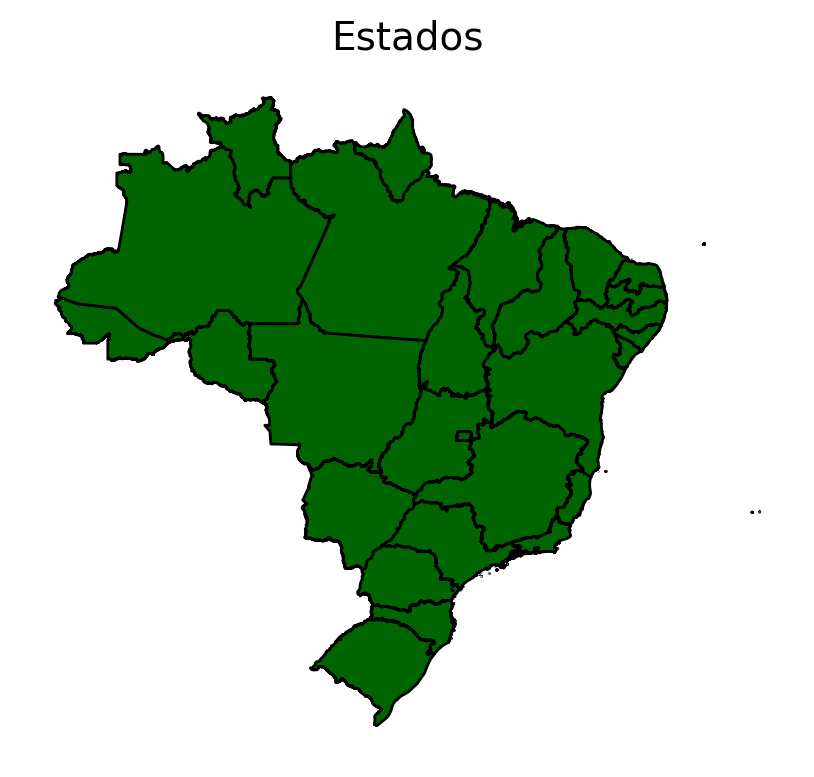

In [ ]:
# Imprimindo o mapa com todos os estados
fig, ax = plt.subplots(figsize=(5, 5), dpi=200) # Plotando o mapa com dimenssão 5x5

estados.plot(facecolor="#006400", edgecolor="#000000", ax=ax) # Escolhendo a cor do mapa e cor da borda

ax.set_title("Estados", fontsize=14) # Título

ax.axis("off") # desativa os eixos de exibição

In [ ]:
# Voltando ao nosso dataset
df_resumo_por_estado.columns

Index(['Estado', 'Ocupação UTI', 'Ocupação Clínica', 'Número de Óbitos'], dtype='object')

Para que possamos plotar o mapa com os nossos dados precisamos fazer uma união de ambas tabelas com os nossos dados e a do Geobr.

In [ ]:
# dados da coluna passa a ser minúsculo e remove espaços em branco extras no início e no final
estados["name_state"] = estados["name_state"].str.lower().str.strip()
df_resumo_por_estado["Estado"] = df_resumo_por_estado["Estado"].str.lower().str.strip()

# Juntamos os 2 DataFrame
uniao_df = estados.merge(df_resumo_por_estado, how="left", left_on="name_state", right_on="Estado")

# Exibir o DataFrame resultante
uniao_df.tail()

,code_state,abbrev_state,name_state,code_region,name_region,geometry,Estado,Ocupação UTI,Ocupação Clínica,Número de Óbitos
22,43.0,RS,rio grande do sul,4.0,Sul,"MULTIPOLYGON (((-49.70392 -29.34774, -49.70499...",rio grande do sul,52883.0,408454.0,6521.0
23,50.0,MS,mato grosso do sul,5.0,Centro Oeste,"MULTIPOLYGON (((-57.83371 -20.93628, -57.84443...",mato grosso do sul,79907.0,330253.0,12523.0
24,51.0,MT,mato grosso,5.0,Centro Oeste,"MULTIPOLYGON (((-52.61926 -9.68225, -52.00032 ...",mato grosso,30601.0,148577.0,2417.0
25,52.0,GO,goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-52.36102 -16.08160, -52.35780...",goiás,161650.0,415388.0,32325.0
26,53.0,DF,distrito federal,5.0,Centro Oeste,"MULTIPOLYGON (((-47.81455 -16.04995, -48.27781...",distrito federal,72767.0,414587.0,2358.0


Como podemos ver ambos foram juntos corretamentes através da coluna em comum possuem.

In [ ]:
# Ordenar o DataFrame por Número de Óbitoss em ordem crescente
df_ordenado = uniao_df.sort_values(by="Número de Óbitos")

# Imprimir o DataFrame ordenado
df_ordenado

,code_state,abbrev_state,name_state,code_region,name_region,geometry,Estado,Ocupação UTI,Ocupação Clínica,Número de Óbitos
3,14.0,RR,roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2...",roraima,369.0,1319.00,10.0
5,16.0,AP,amapá,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44252 2...",amapá,3575.0,6027.00,395.0
1,12.0,AC,acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.08554 ...",acre,2112.0,21898.00,407.0
6,17.0,TO,tocantins,1.0,Norte,"MULTIPOLYGON (((-48.23163 -5.94614, -48.22940 ...",tocantins,13743.0,81334.00,1721.0
11,25.0,PB,paraíba,2.0,Nordeste,"MULTIPOLYGON (((-34.79576 -7.35000, -34.79614 ...",paraíba,20605.0,83193.00,1925.0
13,27.0,AL,alagoas,2.0,Nordeste,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75839 ...",alagoas,20145.0,91436.00,2092.0
26,53.0,DF,distrito federal,5.0,Centro Oeste,"MULTIPOLYGON (((-47.81455 -16.04995, -48.27781...",distrito federal,72767.0,414587.00,2358.0
24,51.0,MT,mato grosso,5.0,Centro Oeste,"MULTIPOLYGON (((-52.61926 -9.68225, -52.00032 ...",mato grosso,30601.0,148577.00,2417.0
14,28.0,SE,sergipe,2.0,Nordeste,"MULTIPOLYGON (((-36.91665 -10.84277, -36.91854...",sergipe,48305.0,147662.00,2417.0
4,15.0,PA,pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42843 ...",pará,49279.0,144682.00,2761.0


Ordenamos aqui para verificar e nota-se que São Paulo foi o estado que mais obteve óbitos enquanto Roraima foi o que obteve menor quantidade e que no estado do Amazonas não temos dados nesse dataset de 2022.

In [ ]:
# Verificando o nome das colunas
uniao_df.columns

Index(['code_state', 'abbrev_state', 'name_state', 'code_region',
       'name_region', 'geometry', 'Estado', 'Ocupação UTI', 'Ocupação Clínica',
       'Número de Óbitos'],
      dtype='object')

(-76.24758052684999, -26.59070825415, -35.70232894755001, 7.222992030549992)

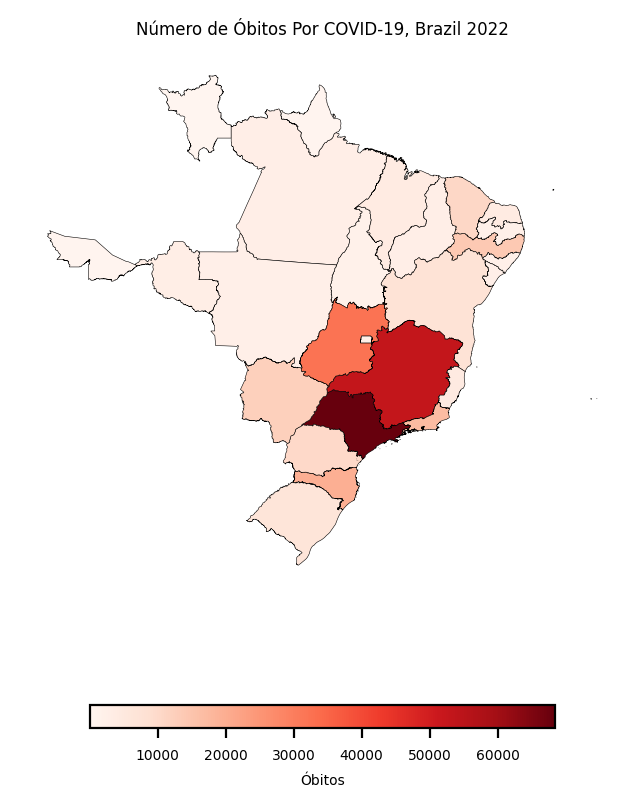

In [ ]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(5, 5), dpi=200) # Figura do mapa com dimensões 5x5

uniao_df.plot(
    column="Número de Óbitos", # Coluna de métrica
    cmap="Reds", # Cor do Mapa
    legend=True, # Legenda
    legend_kwds={ # Parâmetros da legenda
        "label": "Óbitos",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    edgecolor="black",  # Cor das bordas
    linewidth=0.2,  # Largura das bordas
    ax=ax,
)

ax.set_title("Número de Óbitos Por COVID-19, Brazil 2022") # Título
ax.axis("off")

Como já analisado, confirmamos a partir do gráfico.

# **🧠 Fontes**

1. **Artigo Geobr:** https://ipeagit.github.io/geobr/articles/python-intro/py-intro-to-geobr.html#installation

2. **Aulas presenciais e material disponibilizado pelo Professor Adriano**

3. **Brazilian States Choropleth Map with Python:** https://rodrigodutcosky.medium.com/mapas-coropl%C3%A9ticos-com-os-estados-do-brasil-em-python-b9b48c6db585

4. **ChatGPT**

# **🔚 C'est fini!**